У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

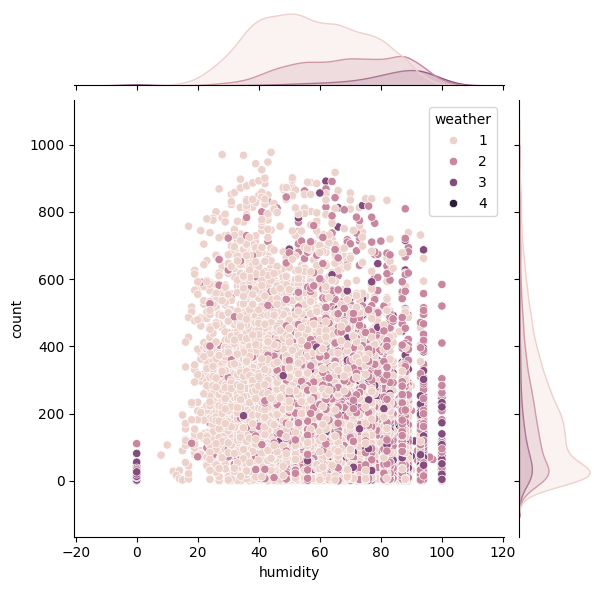

In [58]:
sns.jointplot(data=df, x="humidity", y="count", hue="weather");

З даного графіку бачимо, що найбільша кількість велосипедів була взята в оренду в гарну погоду, а також при нижчій вологості. Далі, чим гірша погода, тим менше людей користуються сервісом. Ще на графіку видно чітку кореляцію між погодою та вологістю: якщо йдуть опади - вологість збільшується, якщо опадів немає - вологість менша. Загалом, графік виглядає цілком логічно. Є нюанси, які викликають питання - це точки з нульовою вологістю, які ми вже спростерігали на графіку в попередньому дз.
Для мене тут складно давати рекомендації щодо розвитку бізнесу, адже погода це зовнішній фактор, який не залежить від нас. І акція "зареєструйся в дощ - отримай знижку" навряд чи спрацює)). Можна подумати про якісь "дощові" велосипеди, тобто щоб вони мали щось типу кабінки чи прикріпленої парасолі і пасажир не намокав під нею під час дощу)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

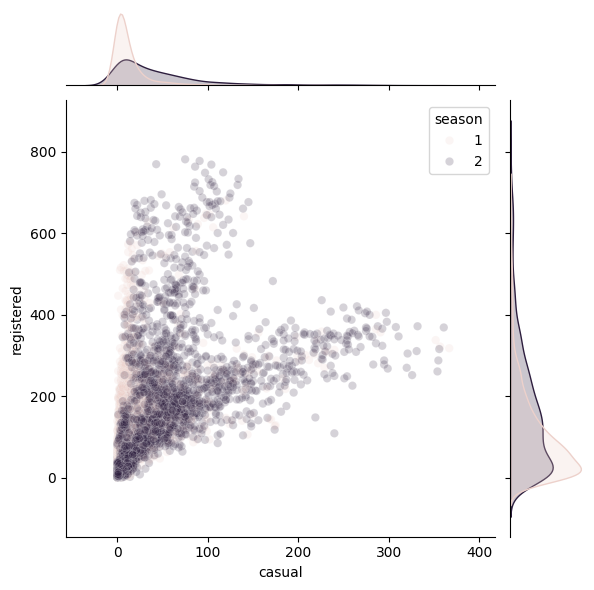

In [59]:
filtered_seasons = df[(df['season'] == 1) | (df['season'] == 2)]
sns.jointplot(data=filtered_seasons, x="casual", y="registered", hue="season", alpha=.2);

1: весна, 2: літо
На цьому графіку чісто видно, що найбільша кількість користувачів (як зареєстрованих, так і звичайних) спостерігається влітку. Такий розподіл цілком закономірний, адже теплий сезон найкраще підходить для їзди на велосипеді. Також бачимо, що співвідношення зареєстрованих і звичайних користувачів є нестабільним. Іноді їх може бути 50/50, іноді зареєстрованих більше, іноді звичайних більше. Варто дослідити, від чого це залежить. На зідзвоні ми з"ясували, що зареєстрованих користувачів більше в будні, а звичайних - у вихідні. На основі цього можна створити якусь додаткову програму лояльності для тих, хто зареєструється на вихідних.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


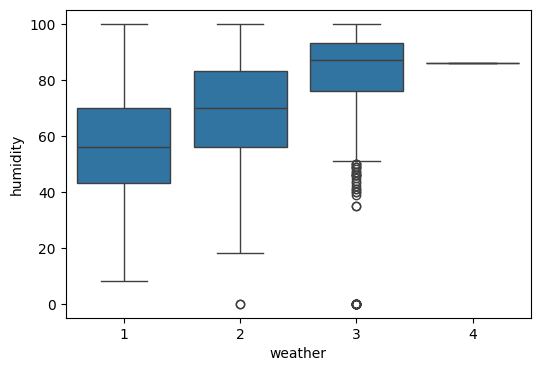

In [60]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='weather', y='humidity', data=df);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [61]:
df_filtered = df[['workingday', 'casual', 'registered', 'count']]

<Figure size 500x500 with 0 Axes>

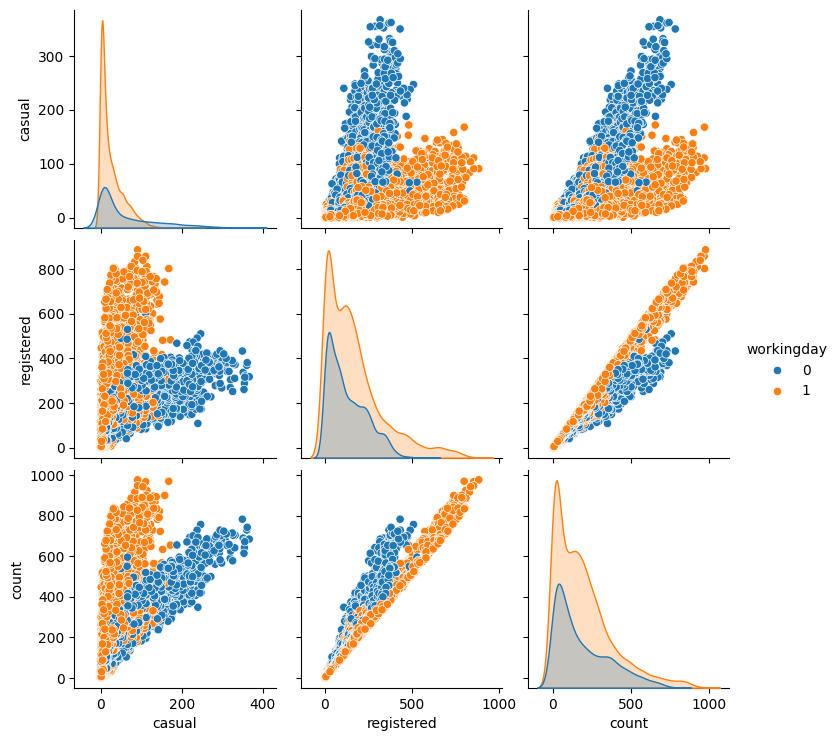

In [62]:
plt.figure(figsize=(5,5))
sns.pairplot(data=df_filtered, hue="workingday");

будній день - 1, вихідний – 0.
З даного графіку бачимо, що на вихідних незареєстрованих користувачів більше, ніж зареєстрованих, а в будні - навпаки. Також видно, що загалом в будні більше користувачів, ніж на вихідних. Тому варто стимулювати користувачів до оренди сервісу на вихідних.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [63]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [70]:
df['date'] = df.datetime.dt.date

In [71]:
df_viz = df[['registered', 'casual', 'date']].groupby('date').sum().reset_index()

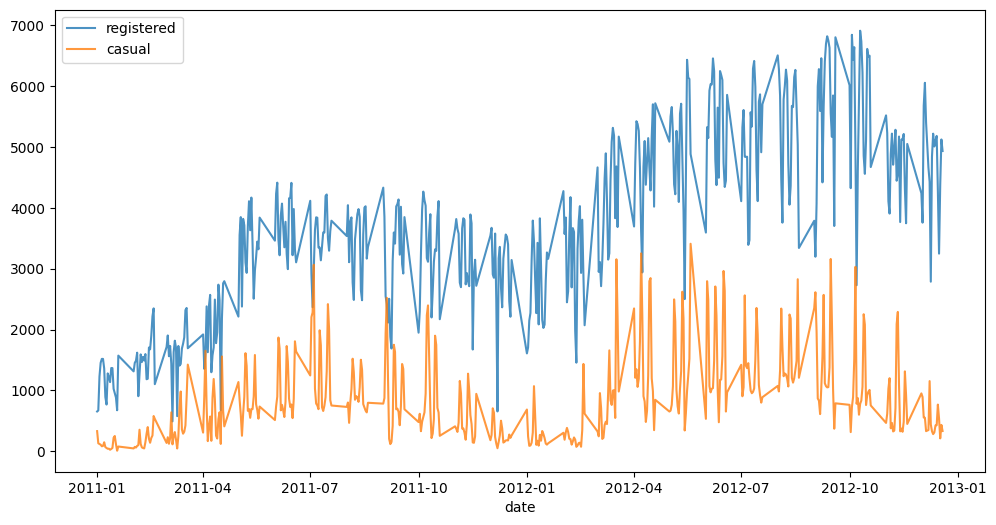

In [72]:
df_viz.set_index('date')[['registered', 'casual']].plot(
    figsize=(12, 6),
    alpha=0.8);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
